<a href="https://colab.research.google.com/github/MalakAhmed2003/Cellula/blob/main/Cellula_task_4_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls "/content/drive/MyDrive/satalite data/data/images"
!ls "/content/drive/MyDrive/satalite data/data/labels"

ls: cannot access '/content/drive/MyDrive/satalite data/data/images': No such file or directory
ls: cannot access '/content/drive/MyDrive/satalite data/data/labels': No such file or directory


In [2]:
import os
import numpy as np
from PIL import Image
import cv2
from google.colab import drive

# === Mount Google Drive ===
# Mountpoint should be a local directory path, not a URL
drive.mount('/content/drive')

# === Set Paths ===
# Update paths to point to the unzipped data directory
image_dir = "/content/drive/MyDrive/satalite data/data/images"
mask_dir  = "/content/drive/MyDrive/satalite data/data/labels"

Mounted at /content/drive


In [3]:
import os
import numpy as np
import tifffile
import cv2
from PIL import Image

def load_tif_images_and_png_masks(image_dir, mask_dir, img_size=(128, 128), max_channels=12):
    images = []
    masks = []

    # Extract filenames without extensions
    image_files = {os.path.splitext(f)[0]: f for f in os.listdir(image_dir) if f.endswith(".tif")}
    mask_files  = {os.path.splitext(f)[0]: f for f in os.listdir(mask_dir) if f.endswith(".png")}

    # Use only matching base names
    common_keys = sorted(set(image_files.keys()) & set(mask_files.keys()))
    print(f"✅ Found {len(common_keys)} matched image–mask pairs.")

    for key in common_keys:
        try:
            img_path = os.path.join(image_dir, image_files[key])
            mask_path = os.path.join(mask_dir, mask_files[key])

            # === Load .tif Image ===
            img_array = tifffile.imread(img_path)

            if img_array.ndim == 2:
                img_array = np.expand_dims(img_array, axis=-1)
            elif img_array.shape[0] <= max_channels and img_array.shape[0] < img_array.shape[-1]:
                img_array = np.transpose(img_array, (1, 2, 0))
            if img_array.shape[-1] > max_channels:
                img_array = img_array[..., :max_channels]

            img_array = cv2.resize(img_array, img_size)
            img_array = img_array.astype(np.float32) / 255.0

            # === Load .png Mask ===
            mask = Image.open(mask_path).convert("L")  # convert to grayscale
            mask = mask.resize(img_size, Image.NEAREST)
            mask_array = np.array(mask)
            mask_array = (mask_array > 0).astype(np.uint8)  # binary mask

            images.append(img_array)
            masks.append(mask_array)

        except Exception as e:
            print(f"❌ Skipping {key}: {e}")

    if not images:
        raise ValueError("❌ No matching image–mask pairs were loaded.")

    return np.stack(images), np.stack(masks)


In [4]:
image_dir = "/content/drive/MyDrive/satalite data/data/images"
mask_dir  = "/content/drive/MyDrive/satalite data/data/labels"
X_data, Y_data = load_tif_images_and_png_masks(image_dir, mask_dir)

# Optional: split into train/val/test
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

✅ Found 306 matched image–mask pairs.


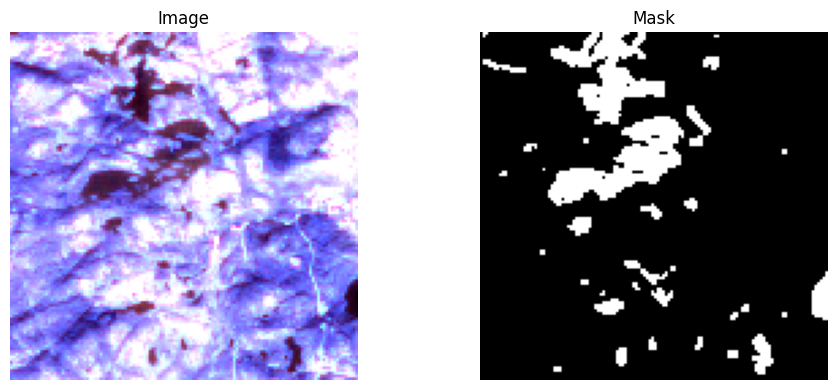

In [5]:
import matplotlib.pyplot as plt

def display_sample(X, Y, index=0):
    image = X[index]
    mask = Y[index]

    if image.shape[-1] > 3:
        image = image[..., :3]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

display_sample(X_data, Y_data, index=0)


In [6]:
from PIL import Image

output_dir = "converted_png"
os.makedirs(output_dir, exist_ok=True)

for path in image_dir:
    try:
        img = tiff.imread(path)
        img = (img / img.max() * 255).astype(np.uint8)
        out_path = os.path.join(output_dir, os.path.basename(path).replace(".tif", ".png"))
        Image.fromarray(img).save(out_path)
    except Exception as e:
        print(f"Could not convert {path}: {e}")


Could not convert /: name 'tiff' is not defined
Could not convert c: name 'tiff' is not defined
Could not convert o: name 'tiff' is not defined
Could not convert n: name 'tiff' is not defined
Could not convert t: name 'tiff' is not defined
Could not convert e: name 'tiff' is not defined
Could not convert n: name 'tiff' is not defined
Could not convert t: name 'tiff' is not defined
Could not convert /: name 'tiff' is not defined
Could not convert d: name 'tiff' is not defined
Could not convert r: name 'tiff' is not defined
Could not convert i: name 'tiff' is not defined
Could not convert v: name 'tiff' is not defined
Could not convert e: name 'tiff' is not defined
Could not convert /: name 'tiff' is not defined
Could not convert M: name 'tiff' is not defined
Could not convert y: name 'tiff' is not defined
Could not convert D: name 'tiff' is not defined
Could not convert r: name 'tiff' is not defined
Could not convert i: name 'tiff' is not defined
Could not convert v: name 'tiff' is not 

In [7]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

path =  "/content/drive/MyDrive/satalite data/data/images"

try:
    img = tiff.imread(path)
    print(f"✅ Loaded: shape={img.shape}, dtype={img.dtype}")

    # Normalize for viewing
    img = img.astype(np.float32)
    img -= img.min()
    img /= img.max() if img.max() > 0 else 1

    plt.imshow(img if img.ndim == 2 else img[..., 0], cmap='gray')
    plt.title("Preview of 58.tif")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"❌ Failed to load: {e}")


❌ Failed to load: [Errno 21] Is a directory: '/content/drive/.shortcut-targets-by-id/1GQss5oZhv-0dxoRtI5m_m_SPbm-E3vXJ/satalite data/data/images'


In [8]:
import tifffile as tiff
import numpy as np
from tqdm import tqdm
from PIL import Image

def load_and_normalize_tif(path):
    img = tiff.imread(path).astype(np.float32)

    # Normalize to [0, 1]
    img -= img.min()
    if img.max() > 0:
        img /= img.max()

    # Ensure 3D shape: (H, W, C)
    if img.ndim == 2:
        img = np.expand_dims(img, axis=-1)
    return img

def load_and_prepare_dataset_tiff(image_paths, label_paths):
    X = []
    Y = []

    for img_path, lbl_path in tqdm(zip(image_paths, label_paths), total=len(image_paths)):
        try:
            img = load_and_normalize_tif(img_path)
            lbl = np.array(Image.open(lbl_path)).astype(np.int64)

            X.append(img)
            Y.append(lbl)
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

    return np.array(X), np.array(Y)


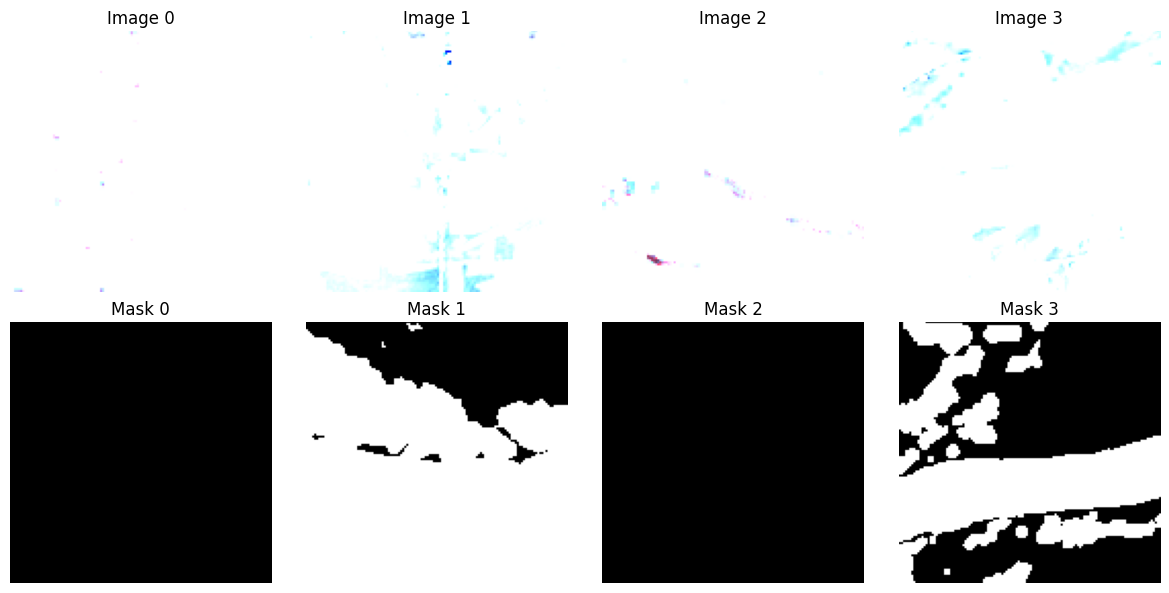

In [9]:
import matplotlib.pyplot as plt

def show_batch(images, masks, num=4):
    plt.figure(figsize=(12, 6))

    for i in range(num):
        # Image
        plt.subplot(2, num, i + 1)
        img = images[i]

        if img.shape[-1] == 1:
            plt.imshow(img[:, :, 0], cmap='gray')
        elif img.shape[-1] >= 3:
            plt.imshow(img[:, :, :3])  # show first 3 bands
        else:
            raise ValueError(f"Image has unsupported shape: {img.shape}")

        plt.title(f"Image {i}")
        plt.axis("off")

        # Mask
        plt.subplot(2, num, i + 1 + num)
        plt.imshow(masks[i], cmap='gray')
        plt.title(f"Mask {i}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show first 4
show_batch(X_train, Y_train, num=4)


In [10]:
!pip install segmentation-models-pytorch efficientnet-pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.2 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3

In [11]:
# 📦 Install if needed
!pip install segmentation_models_pytorch --quiet

# 🧠 Load Pretrained U-Net
import segmentation_models_pytorch as smp
import torch

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔧 Model configuration
model = smp.Unet(
    encoder_name="resnet34",        # Encoder backbone
    encoder_weights="imagenet",     # Use ImageNet pretrained weights
    in_channels=12,                  # RGB input
    classes=1,                      # Binary mask output (1 channel)
    activation=None                 # We'll apply sigmoid manually during inference
)

# Move model to GPU or CPU
model = model.to(device)

print("✅ Pretrained U-Net model loaded.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

✅ Pretrained U-Net model loaded.


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision.models import resnet50
import numpy as np
from sklearn.metrics import classification_report

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Helper: Create dataloader from NumPy arrays ===
def create_dataloader(X, Y, batch_size=8, shuffle=False):
    X_tensor = torch.tensor(X, dtype=torch.float32).permute(0, 3, 1, 2)  # NHWC → NCHW
    Y_tensor = torch.tensor(Y, dtype=torch.long)  # Masks as integer labels
    dataset = TensorDataset(X_tensor, Y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# === Dataloaders ===
train_loader = create_dataloader(X_train, Y_train, batch_size=8, shuffle=True)
val_loader   = create_dataloader(X_val, Y_val, batch_size=8, shuffle=False)
test_loader  = create_dataloader(X_test, Y_test, batch_size=8, shuffle=False)

# === Load Pretrained DeepLabV3 ===
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)

# === Modify first conv layer to accept 12-channel input ===
# Old: Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
old_conv = model.backbone.conv1
new_conv = nn.Conv2d(12, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Copy weights from original 3 channels, others = mean
with torch.no_grad():
    new_conv.weight[:, :3] = old_conv.weight
    if new_conv.weight.shape[1] > 3:
        mean_weights = old_conv.weight.mean(dim=1, keepdim=True)
        new_conv.weight[:, 3:] = mean_weights.repeat(1, 9, 1, 1)  # Fill remaining channels

model.backbone.conv1 = new_conv

# === Modify classifier for 2-class output ===
model.classifier[4] = nn.Conv2d(256, 2, kernel_size=1)
model = model.to(device)

# === Loss & Optimizer ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# === Training Loop ===
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)['out']  # [B, C, H, W]
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_loader):.4f}")

    # === Validation ===
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)['out']
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    print(f"→ Validation Loss: {val_loss / len(val_loader):.4f}")

# === Testing ===
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        outputs = model(images)['out']
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.append(preds)
        all_labels.append(masks.numpy())

# Flatten predictions and ground truth
y_true = np.concatenate([y.flatten() for y in all_labels])
y_pred = np.concatenate([y.flatten() for y in all_preds])

# === Classification Report ===
print("\n✅ Water Class Metrics:")
print(classification_report(y_true, y_pred, target_names=["Non-Water", "Water"], zero_division=0))


Epoch [1/100], Train Loss: 0.4561
→ Validation Loss: 0.3058
Epoch [2/100], Train Loss: 0.3229
→ Validation Loss: 0.2578
Epoch [3/100], Train Loss: 0.2604
→ Validation Loss: 0.2402
Epoch [4/100], Train Loss: 0.2368
→ Validation Loss: 0.2113
Epoch [5/100], Train Loss: 0.2244
→ Validation Loss: 0.2196
Epoch [6/100], Train Loss: 0.2445
→ Validation Loss: 0.2424
Epoch [7/100], Train Loss: 0.2575
→ Validation Loss: 0.2313
Epoch [8/100], Train Loss: 0.2000
→ Validation Loss: 0.1966
Epoch [9/100], Train Loss: 0.1917
→ Validation Loss: 0.2082
Epoch [10/100], Train Loss: 0.1704
→ Validation Loss: 0.1891
Epoch [11/100], Train Loss: 0.1590
→ Validation Loss: 0.1868
Epoch [12/100], Train Loss: 0.1476
→ Validation Loss: 0.1900
Epoch [13/100], Train Loss: 0.1399
→ Validation Loss: 0.1753
Epoch [14/100], Train Loss: 0.1367
→ Validation Loss: 0.1704
Epoch [15/100], Train Loss: 0.1378
→ Validation Loss: 0.1824
Epoch [16/100], Train Loss: 0.1303
→ Validation Loss: 0.1679
Epoch [17/100], Train Loss: 0.129